# Simulated Annealing

Simulated Annealing is a permutation of the original Metropolis-Hastings algorithm, where we additionally
add a cooling schedule to help explore the modality of a space. Modality being the "bumpiness" of the space. It's a practical method of 'extremizing' a function, by searching for the maximum or minimum of the space.

Here we consider a shifted Sinc function, and only fit to a one dimensional space. The procedure is as follows:

1) Choose a random starting point $x$

2) Make a proposal $x + \delta x$ and evaluate the "energy" of the proposal and our current proposal

3) Accept the proposal with some probability:

$$ \exp\bigg[\big({E_{i} - E_{i+1}\big) / T_{i}}\bigg] $$

Where $T_{i}$ is some cooling schedule. The choice of cooling schedule is critical, however the major benefit is that unlike the stock metropolis-hastings algorithm there is less tendency to get stuck into multiple minimum. In this example, the cooling schedule is taken to be the error function, which is:

$$ erf(x) = \frac{2}{\sqrt{\pi}}\int^{x}_{0}e^{-t^2}\: dt $$

Simulated annealing allows a space to be optimised despite having a multi-modal nature. Subsitute the sinc function whatever model you have for your dataset, and compute the maximum likelihood in the same manner. Extending to N-Dimensions is easy by computing:

$$ P(\theta_1,\theta_2,\theta_3 | D) \propto (D | \theta_1, \theta_2,\theta_3)P(\theta_1)P(\theta_2)P(\theta_3)$$

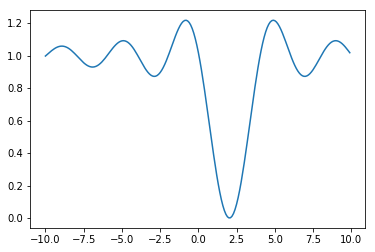

In [42]:
import numpy
import os
import matplotlib.pyplot as plt
from scipy.special import erf
# Define our space to maximise as some Sinc Function.
# Modality very obvious

x = numpy.arange(-10,10,0.1)
space = 1 - (numpy.sin(numpy.pi * x/2-3.2)/(numpy.pi * x/2-3.2))

plt.plot(x,space)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


Acceptances : 2970.000000
Acceptance Ratio: 29.70%


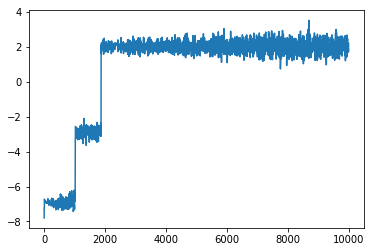

In [72]:
def sinc_function(x,offset):
    return 1 - (numpy.sin(numpy.pi * x/2 - offset) / (numpy.pi * x/2 - offset))


# Declare our markov chain.
niter = 10000
chain = numpy.zeros(shape=(niter),dtype=numpy.float64)
# Declare our cooling schedule
temp = numpy.arange(0.0,niter,1.0/niter)
temp = erf(temp) * 0.1

# Initial guess
chain[0] = -7.8
acceptances = 0
for i in numpy.arange(niter-1):
    
    current_prop = chain[i]
    new_prop = current_prop + numpy.random.normal(0,1.0)
    
    current_energy = sinc_function(current_prop,3.2)
    prop_energy = sinc_function(new_prop,3.2)
    
    #alpha = min(1.0,3.0)
    alpha = min(1.0,numpy.exp((current_energy - prop_energy)/temp[i]))
    
    if (numpy.random.uniform() < alpha):
        chain[i+1] = new_prop
        acceptances += 1
    else:
        chain[i+1] = current_prop

print("Acceptances : %f"%acceptances)
print("Acceptance Ratio: %.2f%%"%(acceptances/niter*100))
xvar = numpy.arange(niter)
plt.plot(xvar,chain)
plt.show()
